# This file is simply to make some bargraphs of kmeans for the final paper and M2M presentation (systems analyses)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
values=np.load('/zfshomes/lperez/ba_and_ma/final_thesis_data/kluster_output/redone_kluster_labels_2clust.npy',allow_pickle=True)
print(values.shape)

(6400,)


In [3]:
values+=1
values_list=np.asarray(values).reshape(-1)  #
print(values_list)
print(type(values_list))
print(type(values_list[0]))

[1 1 1 ... 2 2 2]
<class 'numpy.ndarray'>
<class 'numpy.int32'>


In [4]:
types = set(type(v) for v in values_list)
print(types)

{<class 'numpy.int32'>}


In [5]:
values_list=pd.Series(values_list)
GCU_vals=values_list[0:3200]
CGU_vals=values_list[3200:6400]
print(type(CGU_vals))

<class 'pandas.core.series.Series'>


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Example input
labels = np.array(['CCU_GCU'] * 3200 + ['CCU_CGU'] * 3200)
values = np.array(values)  # Make sure it's a flat np.array of ints

# Get masks for each system
mask_gcu = labels == 'CCU_GCU'
mask_cgu = labels == 'CCU_CGU'

# Get value subsets
gcu_vals = values[mask_gcu]
cgu_vals = values[mask_cgu]

# Count unique values
gcu_unique, gcu_counts = np.unique(gcu_vals, return_counts=True)
cgu_unique, cgu_counts = np.unique(cgu_vals, return_counts=True)

# Build union of all value labels
all_labels = np.array(sorted(set(gcu_unique) | set(cgu_unique)))

# Align counts to full label set
def align_counts(unique_vals, counts, all_labels):
    label_to_count = dict(zip(unique_vals, counts))
    return np.array([label_to_count.get(k, 0) for k in all_labels])

gcu_aligned = align_counts(gcu_unique, gcu_counts, all_labels)
cgu_aligned = align_counts(cgu_unique, cgu_counts, all_labels)


/tmp/ipykernel_3350020/709616186.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plasma = cm.get_cmap('plasma')


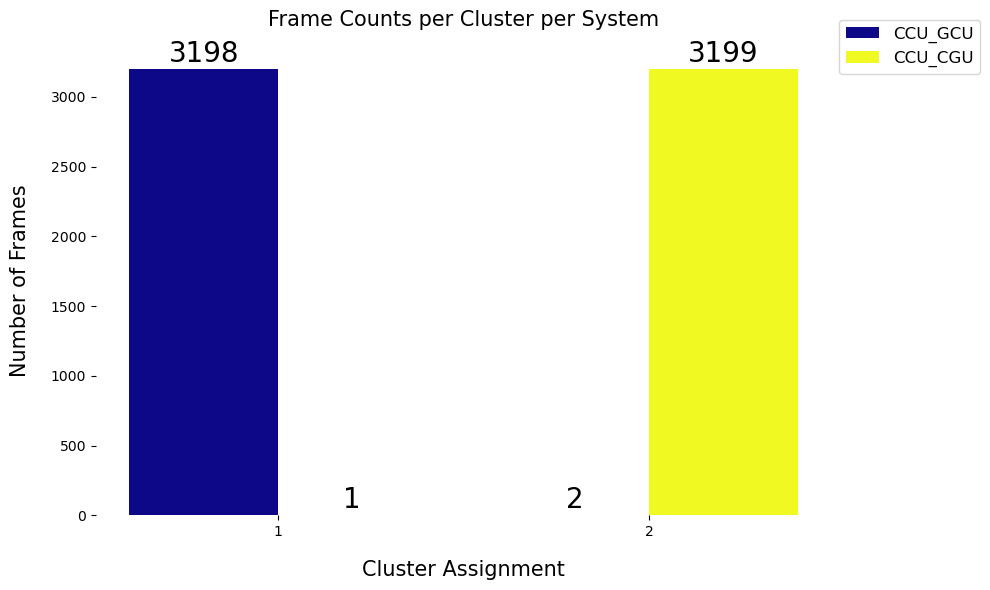

In [7]:
import numpy as np
import matplotlib.pyplot as plt

bar_width = 0.4
x = np.arange(len(all_labels))

fig, ax = plt.subplots(figsize=(10, 6))


# a nice little work arround for grabbing the colors of the plasma colormap
from matplotlib import cm

plasma = cm.get_cmap('plasma')

# Use ends of the colormap spectrum
purple_color = plasma(0.0)   # start of plasma: dark purple
yellow_color = plasma(1.0)   # end of plasma: bright yellow

#this is where we actually add the bars
gcu_bars = ax.bar(x - bar_width/2, gcu_aligned, width=bar_width, label='CCU_GCU', color=purple_color)
cgu_bars = ax.bar(x + bar_width/2, cgu_aligned, width=bar_width, label='CCU_CGU', color=yellow_color)


# Add labels above bars
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 10,                    # spacing above bar
                str(height),
                ha='center', va='bottom',
                fontsize=20
            )

add_bar_labels(gcu_bars)
add_bar_labels(cgu_bars)

# setting the spines to false
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_xticks(x)
ax.set_xticklabels(all_labels)
ax.set_xlabel('Cluster Assignment', fontsize=15, labelpad=15)
ax.set_ylabel('Number of Frames', fontsize=15, labelpad=15)
ax.set_title('Frame Counts per Cluster per System', fontsize=15, pad=15)

ax.legend(loc='center left', bbox_to_anchor=(1, 1), fontsize=12)
plt.tight_layout()
plt.savefig('framecluster_bars.png', dpi=500)
plt.show()


# Just kidding I ended up needing to make more graphs because that is also now the next step

In [8]:
import matplotlib.pyplot as plt
import numpy as np
labels_2clust=np.load('/zfshomes/lperez/ba_and_ma/final_thesis_data/kluster_output/redone_kluster_labels_2clust.npy')

In [9]:
GCU_only=labels_2clust[0:1600]
CGU_only=labels_2clust[3200:4800]
print(GCU_only,CGU_only)

[0 0 0 ... 0 0 0] [1 1 1 ... 1 1 1]


In [10]:
import sys
sys.path.append("/zfshomes/lperez/ba_and_ma/final_thesis_scripts/pypure/utilities/")
from Viz import create_2d_color_mappings,visualize_traj_PCA_onepanel,traj_view_replicates_10by10,label_iterator




In [ ]:
#first run PCA so we can get everything out of the way

from t_a_Manipulation import replicates_to_featurematrix
import numpy as np
from Convenience import test_list_2
from t_a_Manipulation import replicates_to_featurematrix
from Viz import create_2d_color_mappings,visualize_traj_PCA_onepanel,traj_view_replicates_10by10,label_iterator
from dim_reduction import run_PCA

redone_CCU_GCU_fulltraj=np.load('/zfshomes/lperez/ba_and_ma/final_thesis_data/redone_unrestrained_CCU_GCU_Trajectory_array.npy',allow_pickle=True)
redone_CCU_CGU_fulltraj=np.load('/zfshomes/lperez/ba_and_ma/final_thesis_data/redone_unrestrained_CCU_CGU_Trajectory_array.npy',allow_pickle=True)
print(redone_CCU_GCU_fulltraj.shape,redone_CCU_CGU_fulltraj.shape)
redone_arrays=[redone_CCU_GCU_fulltraj,redone_CCU_CGU_fulltraj]
redone_feature_matrix = replicates_to_featurematrix(arrays=redone_arrays)
X_pca,weights,explained_variance_ratio_=run_PCA(redone_feature_matrix,n=2)



In [ ]:
def label_unique_replicates():
    labels = []
    counter = 0

    for i in range(2):
        for i in range(30):
            if i < 20:
                for _ in range(80):
                    labels.append(counter)
                counter += 1
            else:
                for _ in range(160):
                    labels.append(counter)
                counter += 1
        
        counter+=1
    return labels

labels_hopefully = label_unique_replicates()
print(labels_hopefully)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

: 

: 

In [ ]:
visualize_traj_PCA_onepanel(X_pca,color_mappings=labels_hopefully,title="individual replicates labeled"
                            ,savepath="/zfshomes/lperez/ba_and_ma/thesis_figures/PCA/individual_replicates_labeled",clustering=False)

: 

: 